<a href="https://colab.research.google.com/github/Ensyllis/Notes-and-Projects/blob/main/LSTM_AMZN_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This one is a bit more complicated.
#We begin with AMZN as the basis of our stock analysis
#We get the Adjusted Close of each day from Yahoo Finance
#We scale this as training data using sklearning to optimize the run time of the data
#We're using Long-Short-Term Memory as the ML process.
#We parse the data with 60% being the training data and the 40% being the testing set.
#We feed the scaled training data into the LSTM model letting it learn the movements of the stock
#We compare the predicted data with real data in the graph 
#We can see how well the ML predicts the movements of stocks

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import datetime as dt
import yfinance as yf

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
tickers = ['AMZN']
start = dt.datetime(2012,1,1)
end = dt.datetime.now()

df=yf.download(tickers, start, end)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04 00:00:00-05:00,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05 00:00:00-05:00,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06 00:00:00-05:00,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09 00:00:00-05:00,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2022-10-10 00:00:00-04:00,115.099998,116.250000,112.430000,113.669998,113.669998,42339700
2022-10-11 00:00:00-04:00,112.709999,115.480003,110.389999,112.209999,112.209999,56432200
2022-10-12 00:00:00-04:00,112.489998,113.830002,111.400002,112.900002,112.900002,45728700


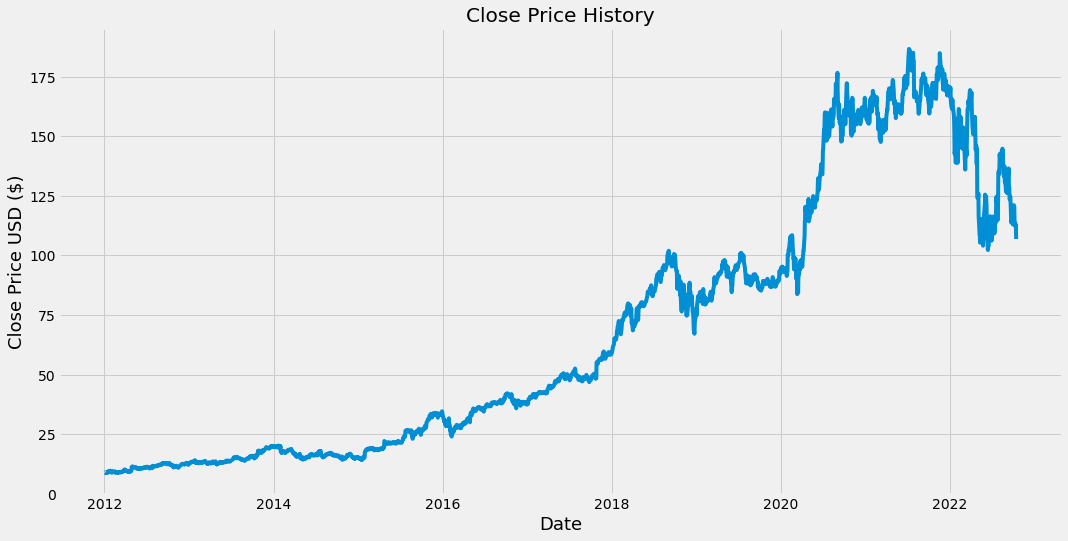

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.show()

In [7]:
data = df.filter(['Adj Close'])
dataset=data.values
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

2172

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [9]:
train_data=scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]



In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2112, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2112/2112 [==============================] - 78s 34ms/step - loss: 6.8013e-04


In [15]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

  

In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))


In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


17/17 [==============================] - 1s 17ms/step


In [19]:
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

4.513888757751352

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


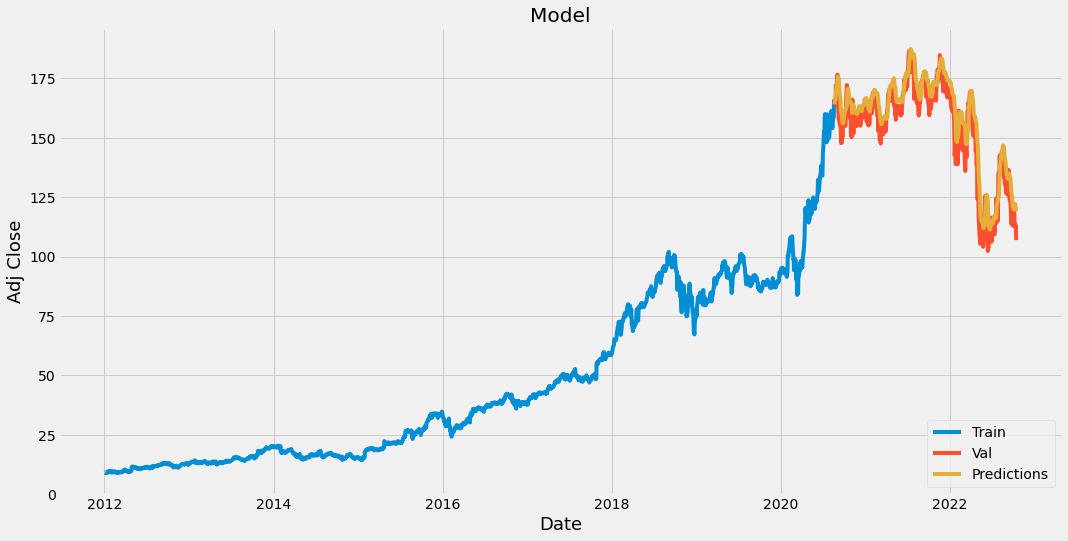

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:

valid

,Adj Close,Predictions
Date,,
2020-08-20 00:00:00-04:00,164.868500,164.087708
2020-08-21 00:00:00-04:00,164.235992,165.218903
2020-08-24 00:00:00-04:00,165.373001,166.157104
2020-08-25 00:00:00-04:00,167.324493,167.032410
2020-08-26 00:00:00-04:00,172.092499,168.010498
...,...,...
2022-10-10 00:00:00-04:00,113.669998,122.141891
2022-10-11 00:00:00-04:00,112.209999,121.629013
2022-10-12 00:00:00-04:00,112.900002,120.735298


In [22]:

apple_quote = yf.download(tickers, start, end)
new_df = apple_quote.filter(['Adj Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 22ms/step
[[117.63864]]


In [23]:
tickers1 = ['AMZN']
start1 = dt.datetime(2012,1,1)
end1 = dt.datetime(2022,6,16)
apple_quote2 = yf.download(tickers1, start1, end1)
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2012-01-03 00:00:00-05:00      8.951500
2012-01-04 00:00:00-05:00      8.875500
2012-01-05 00:00:00-05:00      8.880500
2012-01-06 00:00:00-05:00      9.130500
2012-01-09 00:00:00-05:00      8.928000
                                ...    
2022-06-09 00:00:00-04:00    116.150002
2022-06-10 00:00:00-04:00    109.650002
2022-06-13 00:00:00-04:00    103.669998
2022-06-14 00:00:00-04:00    102.309998
2022-06-15 00:00:00-04:00    107.669998
Name: Close, Length: 2631, dtype: float64
